# Assignment 3 - Deep Learning

## Abstract
<p style='text-align:justify' >
The goal of this assignment is to create a Deep Learning model. The dataset has 5 types of ships which are {'Cargo': 1, 'Military': 2, 'Carrier': 3, 'Cruise': 4, 'Tankers': 5}. Convolutional Neural Network (CNN) is trained with the images of various types of ships using a 60% of the data and validate simulataneously against 20% of the data and finally test the training with the remaining 20% of the data. The CNN is adjusted with various hyperparameters like using different activation functions, loss functions, changing the epochs, using various initialisers, changing network size and layers and finally obtaining the best accurate version of the CNN for the data. The programming is done in TensorFlow language by Google and loss and accuracy plot indicate how good or bad the network is trained aganist the data.

### Problem Statement
<p style='text-align:justify' >
     Developing a Deep Learning model that automatically classifies the type of the ship when one or more images are given as input to the model. 
   It can also be accessed from this link https://www.kaggle.com/arpitjain007/game-of-deep-learning-ship-datasets
   
### Data Introduction
<p style='text-align:justify' >
       The ships dataset from kaggle has around 6252 images which can be split to train and test the neural network. The categories of ships and their corresponding codes in the dataset are as follows - {'Cargo': 1, 'Military': 2, 'Carrier': 3, 'Cruise': 4, 'Tankers': 5}
   
### Solution approach
<p style='text-align:justify' >
   1. Firstly, the csv file which has the image name and category of the image is converted to a pandas dataframe and split into training and testing dataframes.<br><br> 
   2. Secondly, the images using the names and labels in the dataframes are converted to an tuple format which specifies images as numpy n-dimensional arrays of shape (32,32) and the labels in the second part of the tuple.<br><br>
   3. Thirdly, the arrays generated is fed to the neural network made of Conv2D layers, MaxPooling2D, Flatten and Dense layers with appropriate activation functions added to each layer.<br><br>
   4. Finally the results are evaluated with respect to training, validation losses and accuracies to understand the Neural Network behavior.
   


# Part A - Deep Learning model - Convolutional Neural Network (CNN)

## Let's import Libraries

In [73]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.losses import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display, Image

## Data loading

In [2]:
df = pd.read_csv('/Users/mahi/Downloads/game-of-deep-learning-ship-datasets/train.csv', dtype=str)

## Visualizing the Dataset

In [59]:
df.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


Splitting the data into training and testing dataset.

In [4]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

Sample images of ships are shown below

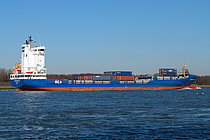

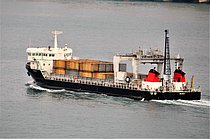

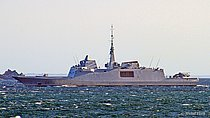

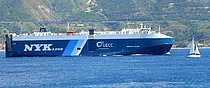

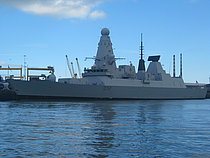

In [80]:
for i in range(5):
    display(Image(width=470,filename='/Users/mahi/Downloads/game-of-deep-learning-ship-datasets/images_use/'+train_data.image[i]))

In [81]:
print(train_data)
print(test_data)

            image category
478   2790315.jpg        1
5099  2895143.jpg        3
1203  2677725.jpg        2
5674  2779530.jpg        2
142   2810767.jpg        1
...           ...      ...
3772  2853892.jpg        1
5191  2903689.jpg        2
5226  1820874.jpg        4
5390  2884285.jpg        5
860   2903475.jpg        2

[5001 rows x 2 columns]
            image category
1703  2525185.jpg        4
5448  2837639.jpg        1
5058  2904577.jpg        1
1149  2866290.jpg        3
432   2459131.jpg        4
...           ...      ...
416   2884436.jpg        5
6110  2782276.jpg        1
3185  2843694.jpg        1
2025  2792377.jpg        1
564   2838422.jpg        3

[1251 rows x 2 columns]


Images can to be converted into (32,32) dimensional arrays using ImageDataGenerator()

In [7]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

### The images data is split into training, validation and testing data using below lines.

In [8]:
path_train = '/Users/mahi/Downloads/game-of-deep-learning-ship-datasets/images_use'
train_df = data_generator.flow_from_dataframe(dataframe=train_data,
                                              directory=path_train,
                                                    x_col='image',
                                                    y_col='category',
                                                    target_size=(32,32),
                                                    class_mode='sparse',
                                                    subset='training',
                                              batch_size=64,
                                                    seed =1
                                                    )
val_df = data_generator.flow_from_dataframe(dataframe=train_data,
                                            directory=path_train,
                                            x_col='image',
                                                    y_col='category',
                                                    target_size=(32,32),
                                                    class_mode='sparse',
                                            batch_size=64,
                                                    subset='validation',
                                                    seed =1
                                                    )
test_df = data_generator.flow_from_dataframe(dataframe=test_data,
                                            directory=path_train,
                                            x_col='image',
                                                    y_col='category',
                                                    target_size=(32,32),
                                                    class_mode='sparse',
                                            batch_size=64,
                                                    seed =1)

Found 4001 validated image filenames belonging to 5 classes.
Found 1000 validated image filenames belonging to 5 classes.
Found 1251 validated image filenames belonging to 5 classes.


### Below are the categories of the ships

In [9]:
categories = ['Cargo','Military', 'Carrier', 'Cruise', 'Tankers']

### Defining 4 functions to model a network, training the model and plotting the training and testing results

In [10]:
def model_cnn(activation_func, optimizer, loss_func):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation_func, input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_func))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_func))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation_func))
    model.add(layers.Dense(10))
    model.compile(loss=loss_func, optimizer=optimizer, metrics=['accuracy'])
    return model
    

In [11]:
def train_model(model,epochs):
    train_steps = train_df.n//train_df.batch_size
    val_steps = val_df.n//val_df.batch_size
    train_results = model.fit(train_df,
                              steps_per_epoch=train_steps, 
                              epochs=epochs, 
                              validation_data=val_df,validation_steps=val_steps)
    return train_results

In [12]:
def plot_train_results(train_results):
    acc = train_results.history['accuracy']
    val_acc = train_results.history['val_accuracy']

    loss = train_results.history['loss']
    val_loss = train_results.history['val_loss']

    plt.figure(figsize=(12, 12))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss')
    plt.ylim([0,max(plt.ylim())])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [13]:
def test_results(model, testing_data):
    test_loss, test_acc = model.evaluate(test_df, verbose=2)
    print('Test loss: ', test_loss)
    print('Test accuracy: ', test_acc)
    return

## The CNN model:
Parameters: 
   * Activation function = ReLU
   * Loss function = SparseCategoricalCrossentropy()
   * Optimizer = ADAM

The convolution neural network is formed by 3 conv2d layers, 2 MaxPooling and 1 Flatten and 1 Dense layers.

In [82]:
model_1 = model_cnn('relu','adam',SparseCategoricalCrossentropy(from_logits=True))
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_12 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)              

## The model is trained for 15 epochs and the maximum validation accuracy achieved is 65.83%

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 15 steps
Epoch 1/15
62/62 [==============================] - 5s 77ms/step - loss: 1.6077 - accuracy: 0.3299 - val_loss: 1.4810 - val_accuracy: 0.3792
Epoch 2/15
62/62 [==============================] - 4s 67ms/step - loss: 1.4243 - accuracy: 0.3942 - val_loss: 1.3398 - val_accuracy: 0.4604
Epoch 3/15
62/62 [==============================] - 4s 66ms/step - loss: 1.2672 - accuracy: 0.4818 - val_loss: 1.2538 - val_accuracy: 0.5031
Epoch 4/15
62/62 [==============================] - 4s 68ms/step - loss: 1.1551 - accuracy: 0.5215 - val_loss: 1.1304 - val_accuracy: 0.5594
Epoch 5/15
62/62 [==============================] - 4s 67ms/step - loss: 1.0656 - accuracy: 0.5662 - val_loss: 1.0898 - val_accuracy: 0.5615
Epoch 6/15
62/62 [==============================] - 4s 68ms/step - loss: 1.0282 - accuracy: 0.5743 - val_loss: 1.0602 - val_accuracy: 0.5708
Epoch 7/15
62/62 [==============================] - 4s 68ms/st

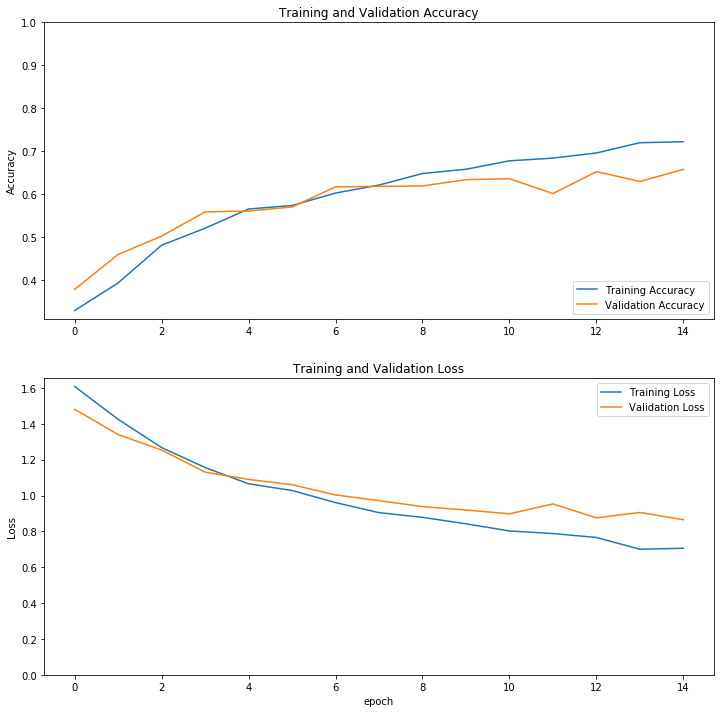

In [15]:
epochs = 15
train_results = train_model(model_1,epochs)
plot_train_results(train_results)

### The testing accuracy is similar to validation accuracy and it is 63.78%

In [16]:
#Testing results:
test_results(model_1, test_df)

  ...
    to  
  ['...']
20/20 - 1s - loss: 0.9016 - accuracy: 0.6379
Test loss:  0.9016146898269654
Test accuracy:  0.6378897


# Part B: Changing the activation function
    1. tanh
    2. softsign

In [17]:
model_2 = model_cnn('tanh','adam',SparseCategoricalCrossentropy(from_logits=True))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 15 steps
Epoch 1/15
62/62 [==============================] - 7s 108ms/step - loss: 0.3695 - accuracy: 0.8793 - val_loss: 0.8516 - val_accuracy: 0.6854
Epoch 2/15
62/62 [==============================] - 6s 90ms/step - loss: 0.3325 - accuracy: 0.8918 - val_loss: 0.8831 - val_accuracy: 0.6823
Epoch 3/15
62/62 [==============================] - 7s 106ms/step - loss: 0.2932 - accuracy: 0.9141 - val_loss: 0.9318 - val_accuracy: 0.6677
Epoch 4/15
62/62 [==============================] - 4s 69ms/step - loss: 0.2416 - accuracy: 0.9411 - val_loss: 0.8931 - val_accuracy: 0.6938
Epoch 5/15
62/62 [==============================] - 5s 75ms/step - loss: 0.1982 - accuracy: 0.9540 - val_loss: 0.9310 - val_accuracy: 0.6625
Epoch 6/15
62/62 [==============================] - 5s 76ms/step - loss: 0.1662 - accuracy: 0.9677 - val_loss: 0.9456 - val_accuracy: 0.6740
Epoch 7/15
62/62 [==============================] - 4s 71ms/

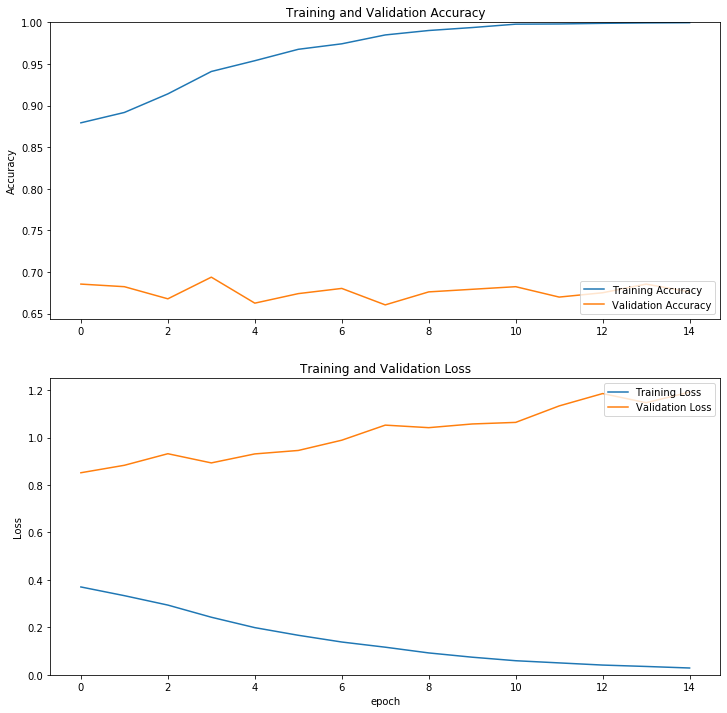

In [83]:
epochs = 15
train_results = train_model(model_2,epochs)
plot_train_results(train_results)

In [84]:
#Testing Results

test_results(model_2, test_df)

  ...
    to  
  ['...']
20/20 - 2s - loss: 1.3779 - accuracy: 0.6315
Test loss:  1.3778504431247711
Test accuracy:  0.6314948


The tanh activation function gave a similar accuracy than relu function with around 63.14% and the learning speed is similar to relu function.

In [86]:
model_3 = model_cnn('softsign', 'adam',SparseCategoricalCrossentropy(from_logits=True))
model_3.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_13 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)              

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 15 steps
Epoch 1/15
62/62 [==============================] - 5s 75ms/step - loss: 0.5165 - accuracy: 0.8082 - val_loss: 0.7955 - val_accuracy: 0.7094
Epoch 2/15
62/62 [==============================] - 6s 104ms/step - loss: 0.4706 - accuracy: 0.8288 - val_loss: 0.8157 - val_accuracy: 0.6865
Epoch 3/15
62/62 [==============================] - 7s 111ms/step - loss: 0.4483 - accuracy: 0.8385 - val_loss: 0.8269 - val_accuracy: 0.6833
Epoch 4/15
62/62 [==============================] - 5s 78ms/step - loss: 0.3966 - accuracy: 0.8677 - val_loss: 0.8438 - val_accuracy: 0.6958
Epoch 5/15
62/62 [==============================] - 7s 113ms/step - loss: 0.3746 - accuracy: 0.8715 - val_loss: 0.8474 - val_accuracy: 0.6927
Epoch 6/15
62/62 [==============================] - 5s 75ms/step - loss: 0.3283 - accuracy: 0.8890 - val_loss: 0.8961 - val_accuracy: 0.6740
Epoch 7/15
62/62 [==============================] - 5s 73ms

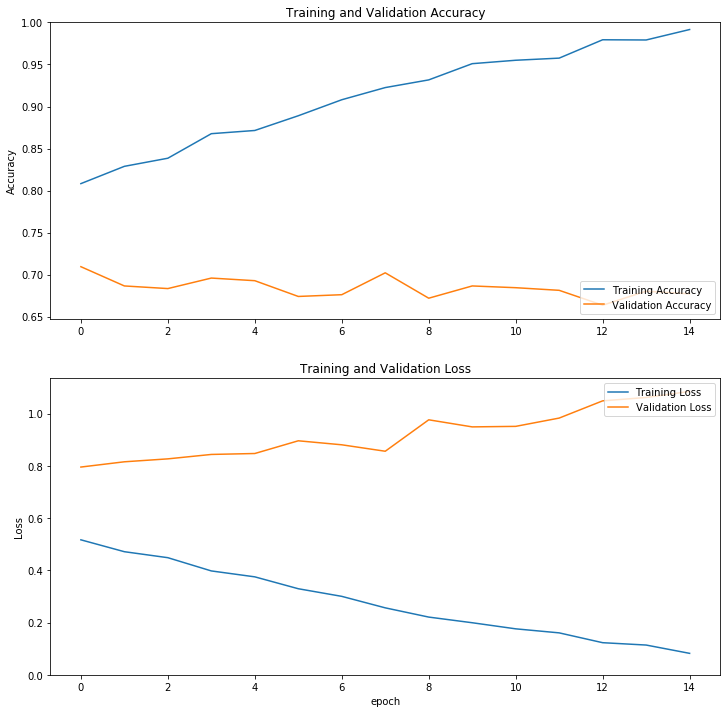

In [85]:
epochs = 15
train_results = train_model(model_3,epochs)
plot_train_results(train_results)

In [87]:
test_results(model_3, test_df)

  ...
    to  
  ['...']
20/20 - 2s - loss: 2.2448 - accuracy: 0.2398
Test loss:  2.244776213169098
Test accuracy:  0.23980816


The softsign activation function gave very less accuracy than tanh function with around 24%  and the learning speed is similar to relu function.

# Part C: Changing Loss function

In [23]:
# model 4:
model_4 = model_cnn('relu', 'adam', 'categorical_hinge')
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 15 steps
Epoch 1/15
62/62 [==============================] - 6s 97ms/step - loss: 1.5900 - accuracy: 0.3355 - val_loss: 1.5424 - val_accuracy: 0.3458
Epoch 2/15
62/62 [==============================] - 4s 63ms/step - loss: 1.5401 - accuracy: 0.3388 - val_loss: 1.4803 - val_accuracy: 0.3531
Epoch 3/15
62/62 [==============================] - 4s 72ms/step - loss: 1.3766 - accuracy: 0.4150 - val_loss: 1.3208 - val_accuracy: 0.4667
Epoch 4/15
62/62 [==============================] - 5s 75ms/step - loss: 1.2031 - accuracy: 0.5100 - val_loss: 1.1436 - val_accuracy: 0.5552
Epoch 5/15
62/62 [==============================] - 4s 72ms/step - loss: 1.0989 - accuracy: 0.5489 - val_loss: 1.0654 - val_accuracy: 0.5917
Epoch 6/15
62/62 [==============================] - 5s 80ms/step - loss: 1.0143 - accuracy: 0.5890 - val_loss: 1.0028 - val_accuracy: 0.6010
Epoch 7/15
62/62 [==============================] - 7s 120ms/s

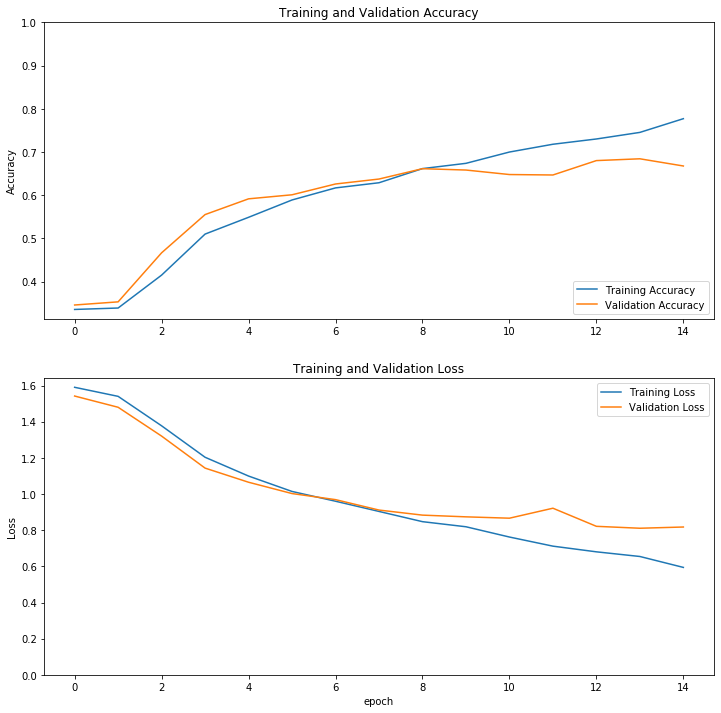

In [88]:
epochs = 15
train_results = train_model(model_3,epochs)
plot_train_results(train_results)

In [89]:
test_results(model_4, test_df)

  ...
    to  
  ['...']
20/20 - 1s - loss: 0.3668 - accuracy: 0.1127
Test loss:  0.36676577031612395
Test accuracy:  0.112709835


In [27]:
# Binary Cross Entropy
model_5 = model_cnn('relu','adam','mean_squared_error')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 15 steps
Epoch 1/15
62/62 [==============================] - 4s 63ms/step - loss: 0.5687 - accuracy: 0.7821 - val_loss: 0.8346 - val_accuracy: 0.6823
Epoch 2/15
62/62 [==============================] - 5s 87ms/step - loss: 0.5131 - accuracy: 0.8082 - val_loss: 0.9171 - val_accuracy: 0.6552
Epoch 3/15
62/62 [==============================] - 7s 119ms/step - loss: 0.4869 - accuracy: 0.8247 - val_loss: 0.7922 - val_accuracy: 0.7021
Epoch 4/15
62/62 [==============================] - 5s 87ms/step - loss: 0.4411 - accuracy: 0.8425 - val_loss: 0.8376 - val_accuracy: 0.6719
Epoch 5/15
62/62 [==============================] - 6s 91ms/step - loss: 0.4171 - accuracy: 0.8557 - val_loss: 0.8478 - val_accuracy: 0.6792
Epoch 6/15
62/62 [==============================] - 7s 113ms/step - loss: 0.3717 - accuracy: 0.8783 - val_loss: 0.8604 - val_accuracy: 0.6677
Epoch 7/15
62/62 [==============================] - 5s 79ms/

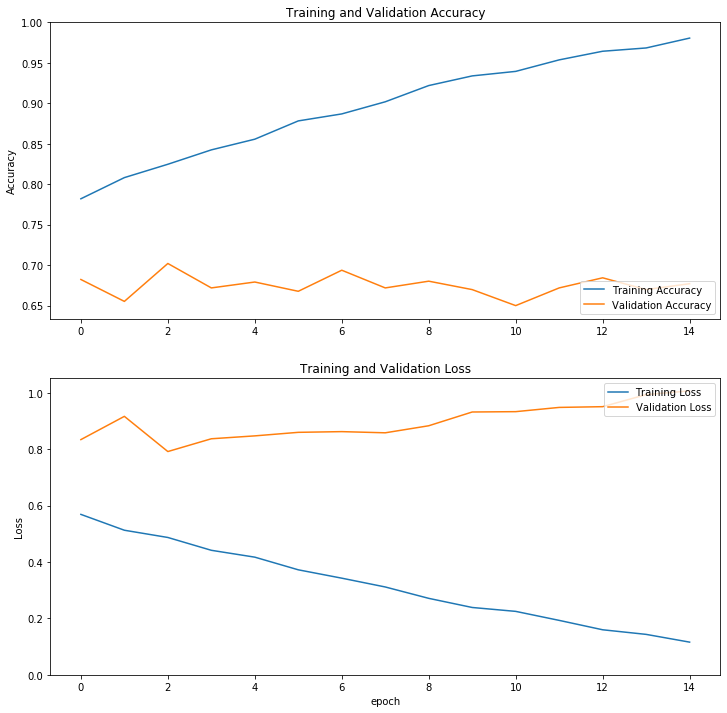

In [90]:
epochs = 15
train_results = train_model(model_4,epochs)
plot_train_results(train_results)

In [29]:
test_results(model_5, test_df)

  ...
    to  
  ['...']
20/20 - 1s - loss: 2.1385 - accuracy: 0.0815
Test loss:  2.1385344505310058
Test accuracy:  0.08153477


# Changing Epochs

In [30]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [31]:
epochs = 10
train_model(model_1,epochs)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 15 steps
Epoch 1/10
62/62 [==============================] - 4s 72ms/step - loss: 0.6436 - accuracy: 0.7531 - val_loss: 0.8468 - val_accuracy: 0.6708
Epoch 2/10
62/62 [==============================] - 4s 68ms/step - loss: 0.5852 - accuracy: 0.7775 - val_loss: 0.8776 - val_accuracy: 0.6490
Epoch 3/10
62/62 [==============================] - 4s 70ms/step - loss: 0.5744 - accuracy: 0.7752 - val_loss: 0.8434 - val_accuracy: 0.6760
Epoch 4/10
62/62 [==============================] - 4s 70ms/step - loss: 0.5200 - accuracy: 0.7976 - val_loss: 0.8563 - val_accuracy: 0.6719
Epoch 5/10
62/62 [==============================] - 4s 72ms/step - loss: 0.4823 - accuracy: 0.8219 - val_loss: 0.9113 - val_accuracy: 0.6729
Epoch 6/10
62/62 [==============================] - 4s 71ms/step - loss: 0.4536 - accuracy: 0.8349 - val_loss: 0.9371 - val_accuracy: 0.6490
Epoch 7/10
62/62 [==============================] - 4s 71ms/st

In [32]:
test_results(model_1, test_df)

  ...
    to  
  ['...']
20/20 - 1s - loss: 1.0565 - accuracy: 0.6403
Test loss:  1.0564565628767013
Test accuracy:  0.64028776


In [33]:
epochs = 5
train_model(model_1, epochs)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 15 steps
Epoch 1/5
62/62 [==============================] - 5s 76ms/step - loss: 0.2936 - accuracy: 0.8989 - val_loss: 1.0273 - val_accuracy: 0.6448
Epoch 2/5
62/62 [==============================] - 5s 75ms/step - loss: 0.2643 - accuracy: 0.9078 - val_loss: 1.1383 - val_accuracy: 0.6521
Epoch 3/5
62/62 [==============================] - 5s 74ms/step - loss: 0.2234 - accuracy: 0.9243 - val_loss: 1.1037 - val_accuracy: 0.6531
Epoch 4/5
62/62 [==============================] - 5s 73ms/step - loss: 0.1915 - accuracy: 0.9413 - val_loss: 1.1928 - val_accuracy: 0.6438
Epoch 5/5
62/62 [==============================] - 4s 71ms/step - loss: 0.1779 - accuracy: 0.9456 - val_loss: 1.2311 - val_accuracy: 0.6594


In [34]:
test_results(model_1, test_df)

  ...
    to  
  ['...']
20/20 - 1s - loss: 1.2272 - accuracy: 0.6611
Test loss:  1.2272152036428452
Test accuracy:  0.6610711


# Changing Gradient Estimation

In [35]:
model_6 = model_cnn(activation_func='relu', optimizer='Adagrad', 
                    loss_func=SparseCategoricalCrossentropy(from_logits=False))
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [36]:
train_model(model=model_6, epochs=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 15 steps
Epoch 1/10
62/62 [==============================] - 5s 76ms/step - loss: 1.8002 - accuracy: 0.3305 - val_loss: 1.4944 - val_accuracy: 0.3448
Epoch 2/10
62/62 [==============================] - 5s 73ms/step - loss: 1.4927 - accuracy: 0.3409 - val_loss: 1.4674 - val_accuracy: 0.3500
Epoch 3/10
62/62 [==============================] - 5s 73ms/step - loss: 1.4582 - accuracy: 0.3475 - val_loss: 1.4239 - val_accuracy: 0.3719
Epoch 4/10
62/62 [==============================] - 5s 73ms/step - loss: 1.4850 - accuracy: 0.3051 - val_loss: 1.4888 - val_accuracy: 0.3625
Epoch 5/10
62/62 [==============================] - 5s 74ms/step - loss: 1.4384 - accuracy: 0.3548 - val_loss: 1.4555 - val_accuracy: 0.3063
Epoch 6/10
62/62 [==============================] - 4s 73ms/step - loss: 1.4087 - accuracy: 0.3637 - val_loss: 1.4123 - val_accuracy: 0.4052
Epoch 7/10
62/62 [==============================] - 5s 75ms/st

In [37]:
test_results(model_6, test_df)

  ...
    to  
  ['...']
20/20 - 1s - loss: 1.4686 - accuracy: 0.4157
Test loss:  1.4686375260353088
Test accuracy:  0.41566747


In [38]:
# Model 7
model_7 = model_cnn('relu', 'Adamax', SparseCategoricalCrossentropy(from_logits=False))
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [39]:
train_model(model_7, epochs = 10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 15 steps
Epoch 1/10
62/62 [==============================] - 5s 80ms/step - loss: 1.6797 - accuracy: 0.3363 - val_loss: 1.5072 - val_accuracy: 0.3458
Epoch 2/10
62/62 [==============================] - 4s 68ms/step - loss: 1.4865 - accuracy: 0.3462 - val_loss: 1.4677 - val_accuracy: 0.3219
Epoch 3/10
62/62 [==============================] - 5s 73ms/step - loss: 1.4241 - accuracy: 0.3830 - val_loss: 1.4031 - val_accuracy: 0.4583
Epoch 4/10
62/62 [==============================] - 4s 69ms/step - loss: 1.4990 - accuracy: 0.3909 - val_loss: 1.4400 - val_accuracy: 0.3396
Epoch 5/10
62/62 [==============================] - 5s 73ms/step - loss: 1.3753 - accuracy: 0.4105 - val_loss: 1.3736 - val_accuracy: 0.4385
Epoch 6/10
62/62 [==============================] - 4s 70ms/step - loss: 1.3276 - accuracy: 0.4536 - val_loss: 1.4580 - val_accuracy: 0.4083
Epoch 7/10
62/62 [==============================] - 6s 92ms/st

In [40]:
test_results(model_7,test_df)

  ...
    to  
  ['...']
20/20 - 1s - loss: 2.3818 - accuracy: 0.3078
Test loss:  2.3817905485630035
Test accuracy:  0.3077538


# Changing network architecture

In [41]:
#Removing a convolution layer in the model
model_8 = models.Sequential()
model_8.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_8.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model_8.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_8.add(layers.Flatten())
model_8.add(layers.Dense(64, activation='relu'))
model_8.add(layers.Dense(10))
model_8.compile(loss=SparseCategoricalCrossentropy(from_logits=False),
                optimizer='adam', metrics=['accuracy'])

In [42]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
flatten_7 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                692288    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 712,330
Trainable params: 712,330
Non-trainable params: 0
________________________________________________

In [43]:
train_model(model_8, epochs=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 15 steps
Epoch 1/10
62/62 [==============================] - 5s 74ms/step - loss: 6.4476 - accuracy: 0.3386 - val_loss: 6.4692 - val_accuracy: 0.3458
Epoch 2/10
62/62 [==============================] - 5s 75ms/step - loss: 6.4386 - accuracy: 0.3396 - val_loss: 6.4652 - val_accuracy: 0.3458
Epoch 3/10
62/62 [==============================] - 4s 72ms/step - loss: 6.4408 - accuracy: 0.3381 - val_loss: 6.4219 - val_accuracy: 0.3458
Epoch 4/10
62/62 [==============================] - 4s 70ms/step - loss: 6.2047 - accuracy: 0.3272 - val_loss: 6.4837 - val_accuracy: 0.2146
Epoch 5/10
62/62 [==============================] - 4s 70ms/step - loss: 6.4657 - accuracy: 0.3459 - val_loss: 6.5384 - val_accuracy: 0.3552
Epoch 6/10
62/62 [==============================] - 4s 66ms/step - loss: 6.4512 - accuracy: 0.3480 - val_loss: 6.5384 - val_accuracy: 0.3552
Epoch 7/10
62/62 [==============================] - 4s 67ms/st

In [44]:
test_results(model_8,test_df)

  ...
    to  
  ['...']
20/20 - 1s - loss: 6.3971 - accuracy: 0.3373
Test loss:  6.397076344490051
Test accuracy:  0.33733013


In [45]:
#Removing a convolution layer in the model
model_9 = models.Sequential()
model_9.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_9.add(layers.Flatten())
model_9.add(layers.Dense(32, activation='relu'))
model_9.add(layers.Dense(10))
model_9.compile(loss=SparseCategoricalCrossentropy(from_logits=False),
                optimizer='adam', metrics=['accuracy'])
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 4, 4, 32)          9248      
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)               

In [46]:
train_model(model_9,epochs=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 15 steps
Epoch 1/10
62/62 [==============================] - 5s 78ms/step - loss: 4.2224 - accuracy: 0.2901 - val_loss: 3.8350 - val_accuracy: 0.3396
Epoch 2/10
62/62 [==============================] - 4s 67ms/step - loss: 3.1007 - accuracy: 0.2954 - val_loss: 1.4977 - val_accuracy: 0.3469
Epoch 3/10
62/62 [==============================] - 4s 67ms/step - loss: 1.4774 - accuracy: 0.3493 - val_loss: 1.4362 - val_accuracy: 0.3896
Epoch 4/10
62/62 [==============================] - 4s 65ms/step - loss: 1.4582 - accuracy: 0.3658 - val_loss: 1.6227 - val_accuracy: 0.3958
Epoch 5/10
62/62 [==============================] - 5s 74ms/step - loss: 1.4210 - accuracy: 0.4270 - val_loss: 1.9790 - val_accuracy: 0.2531
Epoch 6/10
62/62 [==============================] - 4s 66ms/step - loss: 1.4520 - accuracy: 0.3658 - val_loss: 1.3691 - val_accuracy: 0.4333
Epoch 7/10
62/62 [==============================] - 4s 65ms/st

In [47]:
test_results(model_9,test_df)

  ...
    to  
  ['...']
20/20 - 1s - loss: 1.4147 - accuracy: 0.4452
Test loss:  1.41465562582016
Test accuracy:  0.4452438


# Changing Network Initialization

In [48]:
initializer = tf.keras.initializers.RandomUniform() 
model_9 = models.Sequential()
model_9.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_9.add(layers.Dense(32, kernel_initializer=initializer)) 
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_9.add(layers.Flatten())
model_9.add(layers.Dense(64, activation='relu'))
model_9.add(layers.Dense(10, activation='softmax'))
model_9.compile(loss=SparseCategoricalCrossentropy(from_logits=False),
                optimizer='adam', metrics=['accuracy'])
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dense_18 (Dense)             (None, 30, 30, 32)        1056      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)             

In [49]:
train_model(model_9, epochs=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 15 steps
Epoch 1/10
62/62 [==============================] - 5s 86ms/step - loss: 1.6379 - accuracy: 0.3302 - val_loss: 1.5448 - val_accuracy: 0.3458
Epoch 2/10
62/62 [==============================] - 4s 73ms/step - loss: 1.5433 - accuracy: 0.3421 - val_loss: 1.4702 - val_accuracy: 0.3583
Epoch 3/10
62/62 [==============================] - 6s 95ms/step - loss: 1.4220 - accuracy: 0.3909 - val_loss: 1.3375 - val_accuracy: 0.4563
Epoch 4/10
62/62 [==============================] - 7s 110ms/step - loss: 1.2485 - accuracy: 0.4757 - val_loss: 1.2036 - val_accuracy: 0.5094
Epoch 5/10
62/62 [==============================] - 6s 103ms/step - loss: 1.1241 - accuracy: 0.5344 - val_loss: 1.0569 - val_accuracy: 0.5688
Epoch 6/10
62/62 [==============================] - 7s 106ms/step - loss: 1.0405 - accuracy: 0.5611 - val_loss: 0.9987 - val_accuracy: 0.5792
Epoch 7/10
62/62 [==============================] - 6s 91ms

In [50]:
test_results(model_9,test_df)

  ...
    to  
  ['...']
20/20 - 1s - loss: 1.0198 - accuracy: 0.5891
Test loss:  1.0198140770196915
Test accuracy:  0.5891287


In [51]:
initializer = tf.keras.initializers.glorot_uniform() 
model_10 = models.Sequential()
model_10.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_10.add(layers.Dense(32, kernel_initializer=initializer)) 
model_10.add(layers.MaxPooling2D((2, 2)))
model_10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_10.add(layers.MaxPooling2D((2, 2)))
model_10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_10.add(layers.Flatten())
model_10.add(layers.Dense(64, activation='relu'))
model_10.add(layers.Dense(10, activation='softmax'))
model_10.compile(loss=SparseCategoricalCrossentropy(from_logits=False),
                optimizer='adam', metrics=['accuracy'])
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dense_21 (Dense)             (None, 30, 30, 32)        1056      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_10 (Flatten)         (None, 1024)            

In [52]:
train_model(model_10,epochs=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 15 steps
Epoch 1/10
62/62 [==============================] - 5s 80ms/step - loss: 1.5965 - accuracy: 0.3086 - val_loss: 1.5244 - val_accuracy: 0.3479
Epoch 2/10
62/62 [==============================] - 5s 74ms/step - loss: 1.3966 - accuracy: 0.4143 - val_loss: 1.2659 - val_accuracy: 0.5135
Epoch 3/10
62/62 [==============================] - 5s 75ms/step - loss: 1.1753 - accuracy: 0.5149 - val_loss: 1.1045 - val_accuracy: 0.5698
Epoch 4/10
62/62 [==============================] - 5s 75ms/step - loss: 1.0503 - accuracy: 0.5687 - val_loss: 1.0330 - val_accuracy: 0.5979
Epoch 5/10
62/62 [==============================] - 5s 73ms/step - loss: 0.9681 - accuracy: 0.6078 - val_loss: 1.0465 - val_accuracy: 0.5958
Epoch 6/10
62/62 [==============================] - 5s 74ms/step - loss: 0.9266 - accuracy: 0.6152 - val_loss: 0.9754 - val_accuracy: 0.6104
Epoch 7/10
62/62 [==============================] - 5s 75ms/st

In [53]:
test_results(model_10,test_df)

  ...
    to  
  ['...']
20/20 - 1s - loss: 0.9095 - accuracy: 0.6427
Test loss:  0.9094836294651032
Test accuracy:  0.64268583


In [54]:
initializer = tf.keras.initializers.glorot_normal() 
model_11 = models.Sequential()
model_11.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_11.add(layers.Dense(32, kernel_initializer=initializer)) 
model_11.add(layers.MaxPooling2D((2, 2)))
model_11.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_11.add(layers.MaxPooling2D((2, 2)))
model_11.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_11.add(layers.Flatten())
model_11.add(layers.Dense(64, activation='relu'))
model_11.add(layers.Dense(10, activation='softmax'))
model_11.compile(loss=SparseCategoricalCrossentropy(from_logits=False),
                optimizer='adam', metrics=['accuracy'])
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dense_24 (Dense)             (None, 30, 30, 32)        1056      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_11 (Flatten)         (None, 1024)            

In [55]:
train_model(model_11,epochs=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 15 steps
Epoch 1/10
62/62 [==============================] - 5s 82ms/step - loss: 1.6110 - accuracy: 0.3228 - val_loss: 1.5120 - val_accuracy: 0.3458
Epoch 2/10
62/62 [==============================] - 5s 73ms/step - loss: 1.4419 - accuracy: 0.3940 - val_loss: 1.3266 - val_accuracy: 0.4635
Epoch 3/10
62/62 [==============================] - 5s 74ms/step - loss: 1.2663 - accuracy: 0.4824 - val_loss: 1.2172 - val_accuracy: 0.5010
Epoch 4/10
62/62 [==============================] - 5s 73ms/step - loss: 1.1226 - accuracy: 0.5405 - val_loss: 1.1183 - val_accuracy: 0.5542
Epoch 5/10
62/62 [==============================] - 5s 73ms/step - loss: 1.0327 - accuracy: 0.5865 - val_loss: 0.9971 - val_accuracy: 0.6010
Epoch 6/10
62/62 [==============================] - 5s 75ms/step - loss: 0.9468 - accuracy: 0.6157 - val_loss: 0.9821 - val_accuracy: 0.6062
Epoch 7/10
62/62 [==============================] - 7s 110ms/s

In [56]:
test_results(model_11,test_df)

  ...
    to  
  ['...']
20/20 - 1s - loss: 0.9103 - accuracy: 0.6323
Test loss:  0.9102858930826188
Test accuracy:  0.6322942


## Conclusion

        1. The model is trained with epochs of 15 initially but repeated training of the model in the running kernel makes the model overfit the data and could result in fake accuracies.
        2. With hyperparameter tuning, the model is improved by initialising with Xavier Glorot Initialization 
    namely Xavier Uniform and Xavier Gaussian.
        3. It has been observed that the model performed with other loss functions and optimisers but could yield better results with appropriate batch size
        4. Meanwhile, it is also concluded that using different layers and adding more layers in the model would only increase the comkplexity but not improve the accuray unless an appropriate activation function is given.
        3. Later, the model is tuned with various epochs and batch_size to improve accuracy.
        4. Finally, the CNN gave the maximum accuracy of 63% with initial relu activation function and adam optimiser and no initialization and SparseCategoricalCrossEntropy as the best loss function.

# Author
    Bhagyashri Rangnath Gundal (NUID: 001081806)
    Master of Science in Information Systems
    Northeastern University, Boston, MA

# Citation

**References:**<br>
1. ADL (24 April 2018), "*An intuitive guide to Convolutional Neural Networks*" retrieved from https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050/
2. TensorFlow Tutorials,"*Convolutional Neural Network (CNN)*" retrieved from https://www.tensorflow.org/tutorials/images/cnn
3. Analytics Vidhya Courses, "*Convolutional Neural Networks (CNN) from Scratch*" retrieved from https://courses.analyticsvidhya.com/courses/take/convolutional-neural-networks-cnn-from-scratch/texts/10844923-what-is-a-neural-network
4. TensorFlow Core Documentation, "*Module: tf.keras.initializers*" retrieved from  https://www.tensorflow.org/api_docs/python/tf/keras/initializers?version=nightly

# Licensing

MIT License

<p style='text-align:justify'> 
Copyright (c) 2020 Bhagyashri Rangnath Gundal

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
</p>